# Dependencies and Setup

In [2]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [3]:
# Read from csv 
drug_related_deaths_df = pd.read_csv('../Accidental-Drug-Related-Deaths/Reduced_DataSet (1).csv')
drug_related_deaths_df.head()


,Unnamed: 0,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,1.0,13-0102,3/21/2013,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
1,2.0,16-0165,3/13/2016,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
2,3.0,16-0208,3/31/2016,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
3,4.0,13-0052,2/13/2013,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
4,5.0,14-0277,6/29/2014,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,...,N,N,N,N,N,N,N,N,N,N


In [4]:
# Check for missing data
drug_related_deaths_df.count()

Unnamed: 0            5101
ID                    5101
Date                  5100
Age                   5101
Sex                   5098
Race                  5091
DeathCity             5099
DeathCityGeo          5101
COD                   5101
Heroin                5101
Cocaine               5101
Fentanyl              5101
FentanylAnalogue      5101
Oxycodone             5101
Oxymorphone           5101
Ethanol               5101
Hydrocodone           5101
Benzodiazepine        5101
Methadone             5101
Amphet                5101
Tramad                5101
Morphine_NotHeroin    5101
Hydromorphone         5101
Other                 5101
OpiateNOS             5101
AnyOpioid             5101
dtype: int64

In [5]:
# Drop rows with missing data
reduced_df = drug_related_deaths_df.dropna(how='any')
reduced_df.head()

,Unnamed: 0,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,1.0,13-0102,3/21/2013,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
1,2.0,16-0165,3/13/2016,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
2,3.0,16-0208,3/31/2016,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
3,4.0,13-0052,2/13/2013,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
4,5.0,14-0277,6/29/2014,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,...,N,N,N,N,N,N,N,N,N,N


In [6]:
# Accidental Drug-related deaths by Sex
grouped_gender_df = reduced_df.groupby(["Sex"]).agg({'ID':'count'})
grouped_gender_df.head()

,ID
Sex,
Female,1320
Male,3766


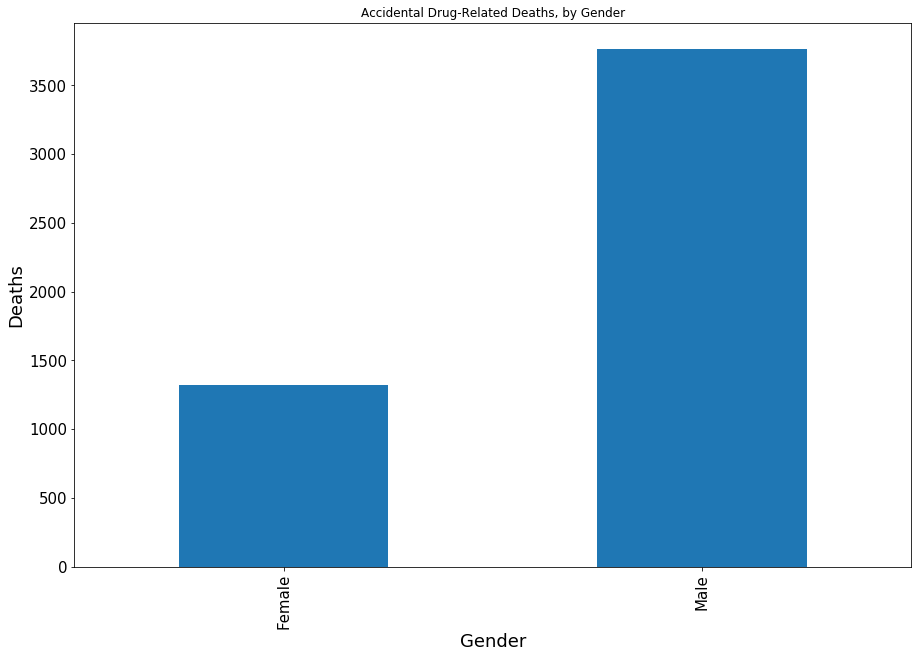

In [22]:
# Graph of Accidental Drug-related Deaths by Sex
ax = grouped_gender_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Gender", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Gender", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.show()

In [23]:
# Accidental Drug-related deaths by Race
grouped_race_df = reduced_df.groupby(["Race"]).agg({'ID':'count'})
grouped_race_df.head(15)

,ID
Race,
Asian,32
Black,432
Chinese,2
Hawaiian,1
Hispanic,584
Native American,1
Other,34
White,4000


In [24]:
# Combine some of the Race values

reduced_df["Race"].replace({"Asian Indian": "Asian", "Asian, Other": "Asian", "Unknown": "Other", "Native American, Other": "Native American", "Hispanic, Black": "Hispanic", "Hispanic, White": "Hispanic"}, inplace=True)

grouped_race_df = reduced_df.groupby(["Race"]).agg({'ID':'count'})
grouped_race_df.head(15)


,ID
Race,
Asian,32
Black,432
Chinese,2
Hawaiian,1
Hispanic,584
Native American,1
Other,34
White,4000


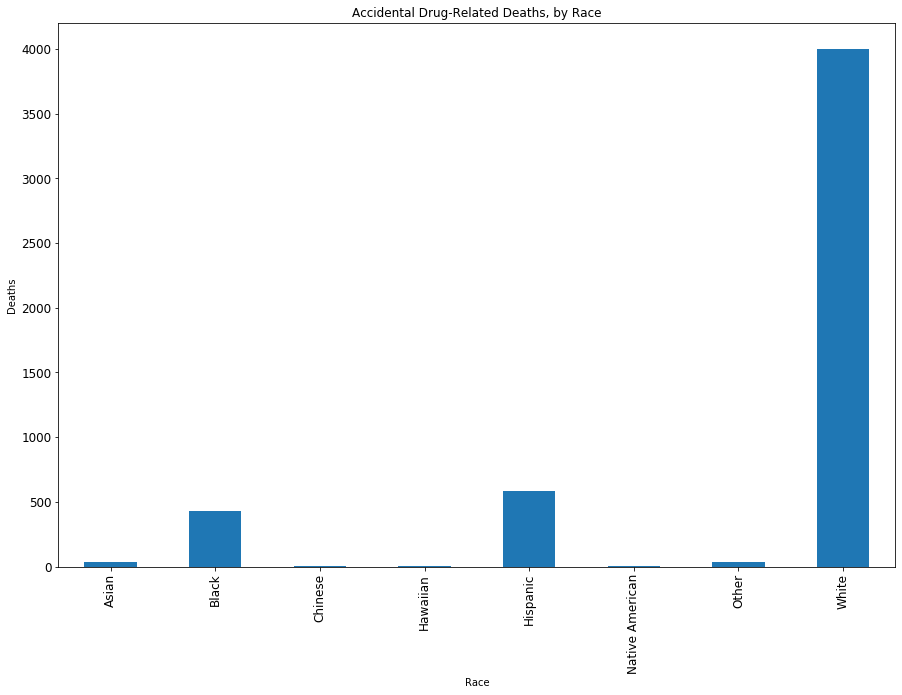

In [25]:
# Bar graph of Accidental Drug-related Deaths by Race
ax = grouped_race_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Race", figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel("Race")
plt.ylabel("Deaths")
plt.show()

In [26]:
# Statistical overview
reduced_df.describe()


,Unnamed: 0,Age
count,5086.000000,5086.000000
mean,2553.534605,41.951829
std,1473.186728,12.334228
min,1.000000,14.000000
25%,1278.250000,32.000000
50%,2554.500000,42.000000
75%,3827.750000,52.000000
max,5104.000000,87.000000


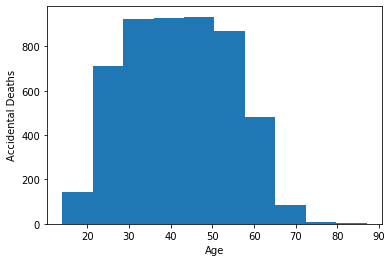

In [27]:
# Histogram of Accidental Deaths by Age
Agedeaths = reduced_df["Age"]

plt.hist(Agedeaths)
plt.xlabel("Age")
plt.ylabel("Accidental Deaths")
plt.show()

In [28]:
# Create age groups (0-under 25, 25-40, 41-65, over 65)
bins = [-1, 25, 41, 66, 199]
AgeGroups = ['Under 25','25-40','41-65','over 65']

#Place data series into new column in dataframe
reduced_df["Age Group"] = pd.cut(reduced_df["Age"], bins, labels=AgeGroups)
reduced_df.head()

grouped_AgeGroup_df = reduced_df.groupby(["Age Group"]).agg({'ID':'count'})
grouped_AgeGroup_df.head(10)

C:\Users\loret\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID
Age Group,
Under 25,503
25-40,1999
41-65,2514
over 65,70


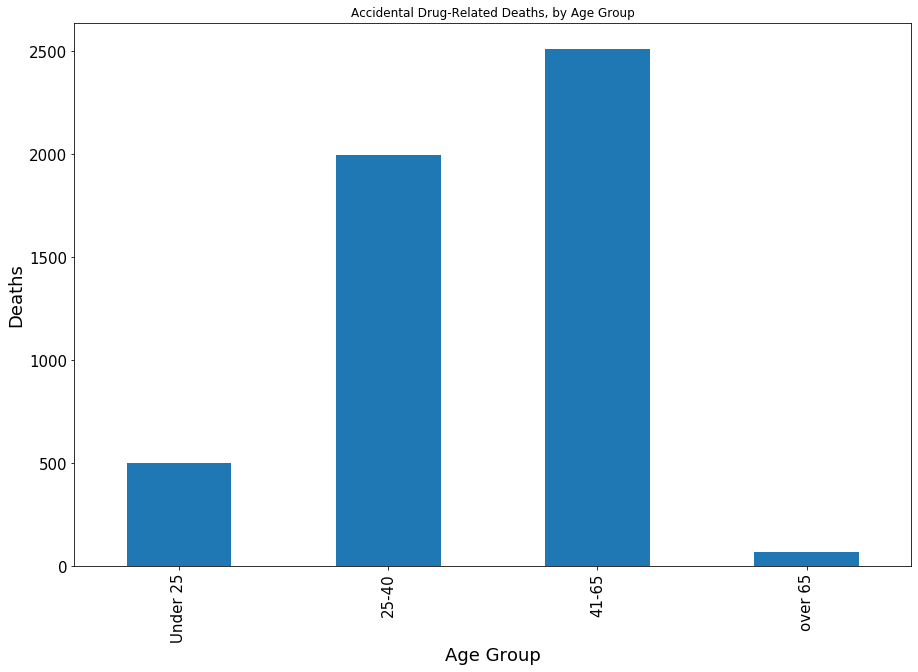

In [29]:
# Accidental Drug-related deaths by Age Groups
ax = grouped_AgeGroup_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Age Group", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.show()
